<a href="https://colab.research.google.com/github/minsoojo/MLprogramming/blob/main/10week/HAR_CNN_LSTM_CNN%2BLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def load_file(filepath):
    dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
    return dataframe.values

In [4]:
# load a list of files and return as a 3d numpy array
def load_group(filenames, prefix=''):
    loaded = list()
    for name in filenames:
        data = load_file(prefix + name)
        loaded.append(data)
    # stack group so that features are the 3rd dimension
    loaded = np.dstack(loaded)
    return loaded

In [5]:
# load a dataset group, such as train or test
def load_dataset_group(group, prefix=''):
    filepath = prefix + group + '/Inertial Signals/'
    # load all 9 files as a single array
    filenames = list()
    # total acceleration
    filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
    # body acceleration
    filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
    # body gyroscope
    filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
    # load input data
    X = load_group(filenames, filepath)
    # load class output
    y = load_file(prefix + group + '/y_'+group+'.txt')
    return X, y

In [6]:
# load the dataset, returns train and test X and y elements
def load_dataset(prefix=''):
    # load all train
    # trainX, trainy = load_dataset_group('train', prefix + '/content/drive/MyDrive/Colab Notebooks/UCI-HAR/UCI-HAR/')
    trainX, trainy = load_dataset_group('train', prefix + '/content/drive/MyDrive/3-2/MLprogramming/10week/UCI-HAR/')
    # load all test
    # testX, testy = load_dataset_group('test', prefix + '/content/drive/MyDrive/Colab Notebooks/UCI-HAR/UCI-HAR/')
    testX, testy = load_dataset_group('test', prefix + '/content/drive/MyDrive/3-2/MLprogramming/10week/UCI-HAR/')

    #zero-offset class values
    trainy = trainy - 1
    testy = testy - 1
    #one hot encode y
    trainy_one_hot = to_categorical(trainy)
    testy_one_hot = to_categorical(testy)
    print(trainX.shape, trainy.shape, trainy_one_hot.shape, testX.shape, testy.shape, testy_one_hot.shape)
    return trainX, trainy, trainy_one_hot, testX, testy, testy_one_hot

In [7]:
trainX, trainy, trainy_one_hot, testX, testy, testy_one_hot = load_dataset()

from sklearn.model_selection import train_test_split

X_train,X_val,y_train_one_hot,y_val_one_hot,y_train,y_val=train_test_split(trainX, trainy_one_hot, trainy,test_size=0.2,random_state=100)

X_train.shape,X_val.shape,y_train_one_hot.shape,y_val_one_hot.shape,y_train.shape,y_val.shape

/tmp/ipython-input-1098839523.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
/tmp/ipython-input-1098839523.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
/tmp/ipython-input-1098839523.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
/tmp/ipython-input-1098839523.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)


(7352, 128, 9) (7352, 1) (7352, 6) (2947, 128, 9) (2947, 1) (2947, 6)


((5881, 128, 9), (1471, 128, 9), (5881, 6), (1471, 6), (5881, 1), (1471, 1))

In [8]:
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train_one_hot.shape[1]

In [9]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import (
    Input, Dense, Flatten, Dropout,
    Conv1D, MaxPooling1D, LSTM, concatenate
)
from tensorflow.keras.utils import to_categorical


In [10]:
##Level_1
# layer 1
inputs1_1= Input(shape=(n_timesteps,n_features))##128,9
conv1_1 = Conv1D(filters=128, kernel_size=3, activation='relu')(inputs1_1) ##none,126,128
# layer 2
inputs1_2= Input(shape=(n_timesteps,n_features))
conv1_2 = Conv1D(filters=128, kernel_size=5, activation='relu')(inputs1_2)##124,128
# layer 3
inputs1_3= Input(shape=(n_timesteps,n_features))
conv1_3 = Conv1D(filters=128, kernel_size=7, activation='relu')(inputs1_3)##122,128
# layer 4
inputs1_4= Input(shape=(n_timesteps,n_features))
conv1_4 = Conv1D(filters=128, kernel_size=9, activation='relu')(inputs1_4)##120,128

# merge1
merged_1 = concatenate([conv1_1,conv1_2,conv1_3,conv1_4],axis=1)

#maxpool1
pool_1=MaxPooling1D(pool_size=5)(merged_1)

##Level_2
# layer 1
conv2_1 = Conv1D(filters=64, kernel_size=3, activation='relu')(pool_1)
# layer 2
conv2_2 = Conv1D(filters=64, kernel_size=5, activation='relu')(pool_1)
# layer 3
conv2_3 = Conv1D(filters=64, kernel_size=7, activation='relu')(pool_1)
# layer 4

conv2_4 = Conv1D(filters=64, kernel_size=9, activation='relu')(pool_1)
# merge2
merged_2 = concatenate([conv2_1,conv2_2,conv2_3,conv2_4],axis=1)

#maxpool2
pool_2=MaxPooling1D(pool_size=5)(merged_2)


##Level_3
# layer 1
conv3_1 = Conv1D(filters=32, kernel_size=3, activation='relu')(pool_2)
# layer 2
conv3_2 = Conv1D(filters=32, kernel_size=5, activation='relu')(pool_2)
# layer 3
conv3_3 = Conv1D(filters=32, kernel_size=7, activation='relu')(pool_2)
# layer 4

conv3_4 = Conv1D(filters=32, kernel_size=9, activation='relu')(pool_2)
# merge2
merged_3 = concatenate([conv3_1,conv3_2,conv3_3,conv3_4],axis=1)

#maxpool2
pool_3=MaxPooling1D(pool_size=5)(merged_3)


#flatten
flat_cnn=Flatten()(pool_3)

##dense layer
dense = Dense(512, activation='relu')(flat_cnn)
outputs = Dense(n_outputs, activation='softmax')(dense)

##MODEL
cnn3_model = Model([inputs1_1, inputs1_2, inputs1_3,inputs1_4], outputs)

cnn3_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn3_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 9)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 128, 9)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_2       │ (None, 128, 9)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_3       │ (None, 128, 9)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 126, 128)  │      3,584 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 124, 128)  │      5,888 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 122, 128)  │      8,192 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_3 (Conv1D)   │ (None, 120, 128)  │     10,496 │ input_layer_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 492, 128)  │          0 │ conv1d[0][0],     │
│ (Concatenate)       │                   │            │ conv1d_1[0][0],   │
│                     │                   │            │ conv1d_2[0][0],   │
│                     │                   │            │ conv1d_3[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d       │ (None, 98, 128)   │          0 │ concatenate[0][0] │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_4 (Conv1D)   │ (None, 96, 64)    │     24,640 │ max_pooling1d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_5 (Conv1D)   │ (None, 94, 64)    │     41,024 │ max_pooling1d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_6 (Conv1D)   │ (None, 92, 64)    │     57,408 │ max_pooling1d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_7 (Conv1D)   │ (None, 90, 64)    │     73,792 │ max_pooling1d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 372, 64)   │          0 │ conv1d_4[0][0],   │
│ (Concatenate)       │                   │            │ conv1d_5[0][0],   │
│                     │                   │            │ conv1d_6[0][0],   │
│                     │                   │            │ conv1d_7[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_1     │ (None, 74, 64)    │          0 │ concatenate_1[0]… │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_8 (Conv1D)   │ (None, 72, 32)    │      6,176 │ max_pooling1d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_9 (Conv1D)   │ (None, 70, 32)    │     10,272 │ max_pooling1d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_10 (Conv1D)  │ (None, 68, 32)    │     14,368 │ max_pooling1d_1[

 Total params: 1,179,014 (4.50 MB)

 Trainable params: 1,179,014 (4.50 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model_history=cnn3_model.fit(x=[X_train,X_train,X_train,X_train], y=y_train_one_hot, epochs=30, batch_size=32,validation_split=0.1)

Epoch 1/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 18s 52ms/step - accuracy: 0.7759 - loss: 0.5655 - val_accuracy: 0.9440 - val_loss: 0.1327
Epoch 2/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9364 - loss: 0.1580 - val_accuracy: 0.9491 - val_loss: 0.0993
Epoch 3/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9477 - loss: 0.1151 - val_accuracy: 0.9576 - val_loss: 0.0973
Epoch 4/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9544 - loss: 0.1099 - val_accuracy: 0.9542 - val_loss: 0.1042
Epoch 5/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9574 - loss: 0.0997 - val_accuracy: 0.9559 - val_loss: 0.0905
Epoch 6/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9617 - loss: 0.0977 - val_accuracy: 0.8846 - val_loss: 0.2787
Epoch 7/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9393 - loss: 0.1605 - val_accuracy: 0.9542 - val_loss: 0.0919
Epoch 8/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9631 - loss: 0.0907 - val_accuracy: 

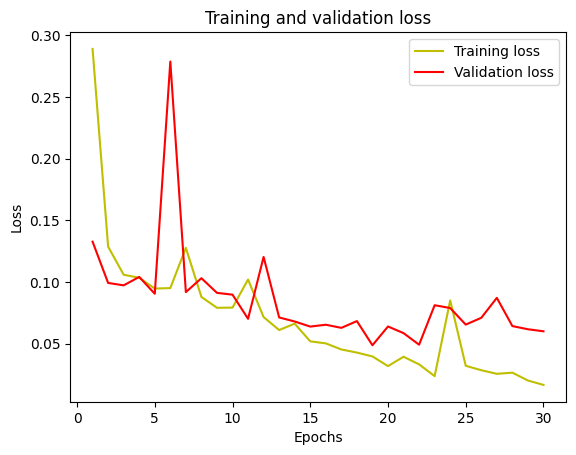

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

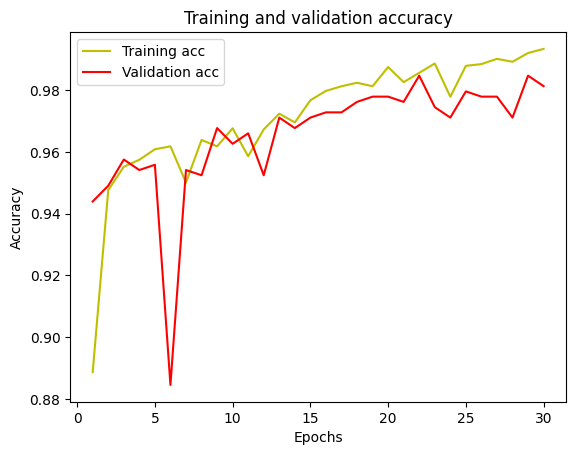

In [13]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step
[[468   1  26   1   0   0]
 [  7 453   6   5   0   0]
 [  0   0 420   0   0   0]
 [  0   0   0 389  96   6]
 [  1   0   0  32 499   0]
 [  0   0   0   0   0 537]]
0.9385816084153377
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       496
           1       1.00      0.96      0.98       471
           2       0.93      1.00      0.96       420
           3       0.91      0.79      0.85       491
           4       0.84      0.94      0.89       532
           5       0.99      1.00      0.99       537

    accuracy                           0.94      2947
   macro avg       0.94      0.94      0.94      2947
weighted avg       0.94      0.94      0.94      2947



<Axes: >

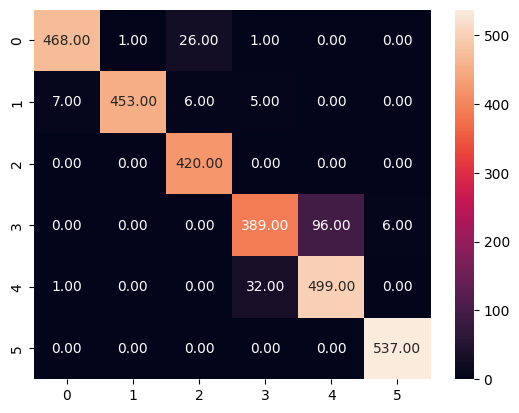

In [14]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
pred=cnn3_model.predict([testX,testX,testX,testX])
pred=np.argmax(pred, axis=-1)
cm=confusion_matrix(testy,pred)
print(cm)
print(accuracy_score(testy,pred))
print(classification_report(testy,pred))
sns.heatmap(cm, annot=True, fmt = '.2f')

1D CNN을 4개 사용 각각 같은 데이터 넣었음, concat 후 다음 레이어

---

X_train,X_val,y_train_one_hot,y_val_one_hot,y_train,y_val

LSTM

In [15]:
import numpy as np, pandas as pd, tensorflow as tf

In [16]:
# # 4. LSTM 모델
# model = tf.keras.Sequential([
#     tf.keras.layers.LSTM(64, input_shape=(window,1)),
#     tf.keras.layers.Dense(1)
# ])
# model.compile(optimizer='adam', loss='mse', metrics=["mae"])
# model_history=model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=1)

In [19]:
inputs_lstm= Input(shape=(n_timesteps,n_features))##128,9

# inputs1_1= Input(shape=(n_timesteps,n_features))##128,9
# conv1_1 = Conv1D(filters=128, kernel_size=3, activation='relu')(inputs1_1) ##none,126,128

# 4. LSTM 모델
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(n_timesteps,n_features)),
    tf.keras.layers.Dense(6, activation='softmax') # Changed to n_outputs (6) and softmax activation
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])
model_history=model.fit(X_train, y_train_one_hot, epochs=30, batch_size=8, verbose=1, validation_split=0.1)

Epoch 1/30
662/662 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.4810 - loss: 1.2611 - val_accuracy: 0.6757 - val_loss: 0.8375
Epoch 2/30
662/662 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.6971 - loss: 0.7397 - val_accuracy: 0.7742 - val_loss: 0.5990
Epoch 3/30
662/662 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7902 - loss: 0.5585 - val_accuracy: 0.6944 - val_loss: 0.7788
Epoch 4/30
662/662 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.8380 - loss: 0.4766 - val_accuracy: 0.9134 - val_loss: 0.2573
Epoch 5/30
662/662 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.8982 - loss: 0.2985 - val_accuracy: 0.9270 - val_loss: 0.2328
Epoch 6/30
662/662 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9315 - loss: 0.1872 - val_accuracy: 0.9389 - val_loss: 0.1877
Epoch 7/30
662/662 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9303 - loss: 0.1926 - val_accuracy: 0.9304 - val_loss: 0.1509
Epoch 8/30
662/662 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9489 - loss: 0.1334 - val_accuracy

In [20]:
# # 5. 예측
# pred = model.predict(X_test)
# # plt.plot(scaler.inverse_transform(y_test), label='True')
# # plt.plot(scaler.inverse_transform(pred), label='Pred')
# plt.plot(y_test, label='True')
# plt.plot(pred, label='Pred')
# plt.legend(); plt.show()

In [21]:
# ##dense layer
# dense = Dense(512, activation='relu')(flat_cnn)
# outputs = Dense(n_outputs, activation='softmax')(dense)

# ##MODEL
# cnn3_model = Model([inputs1_1, inputs1_2, inputs1_3,inputs1_4], outputs)

# cnn3_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# cnn3_model.summary()

# model_history=cnn3_model.fit(x=[X_train,X_train,X_train,X_train], y=y_train_one_hot, epochs=30, batch_size=32,validation_split=0.1)

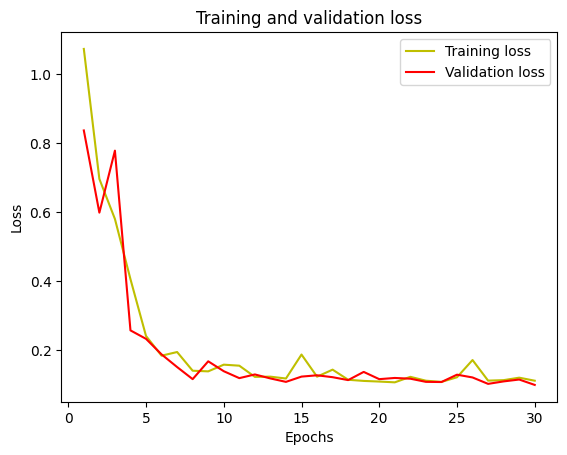

In [22]:
loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

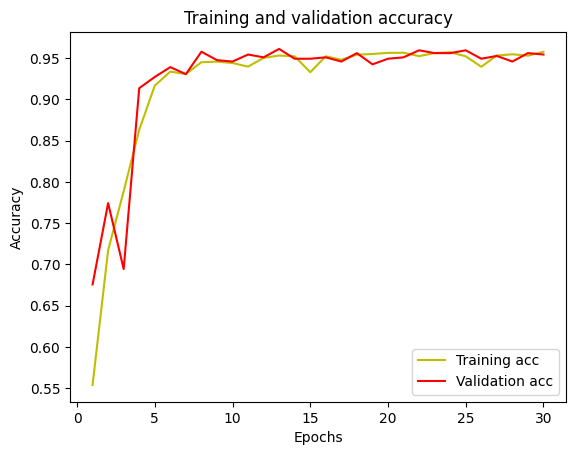

In [23]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

34/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_34
Received: inputs=('Tensor(shape=(32, 128, 9))', 'Tensor(shape=(32, 128, 9))', 'Tensor(shape=(32, 128, 9))', 'Tensor(shape=(32, 128, 9))')
  warnings.warn(msg)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
[[472   7  16   0   1   0]
 [ 14 434  23   0   0   0]
 [  8  15 397   0   0   0]
 [  0   4   0 378 107   2]
 [  0   0   0  64 468   0]
 [  0  27   0   0   0 510]]
0.9022734984730234
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       496
           1       0.89      0.92      0.91       471
           2       0.91      0.95      0.93       420
           3       0.86      0.77      0.81       491
           4       0.81      0.88      0.84       532
           5       1.00      0.95      0.97       537

    accuracy                           0.90      2947
   macro avg       0.90      0.90      0.90      2947
weighted avg       0.90      0.90      0.90      2947



/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_34
Received: inputs=('Tensor(shape=(None, 128, 9))', 'Tensor(shape=(None, 128, 9))', 'Tensor(shape=(None, 128, 9))', 'Tensor(shape=(None, 128, 9))')
  warnings.warn(msg)


<Axes: >

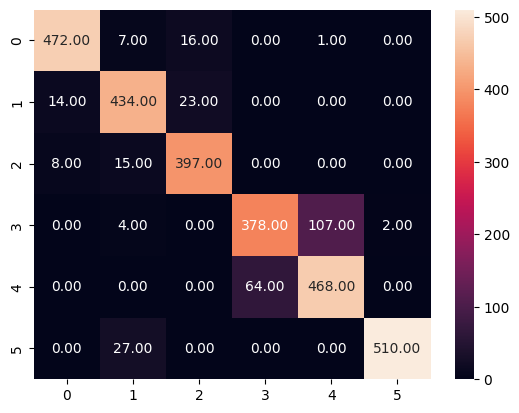

In [24]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
pred=model.predict([testX,testX,testX,testX])
pred=np.argmax(pred, axis=-1)
cm=confusion_matrix(testy,pred)
print(cm)
print(accuracy_score(testy,pred))
print(classification_report(testy,pred))
sns.heatmap(cm, annot=True, fmt = '.2f')

---
cnn + lstm

In [27]:
flat_cnn.shape

(None, 1760)

In [26]:
pool_1,pool_2,pool_3.shape

(<KerasTensor shape=(None, 98, 128), dtype=float32, sparse=False, ragged=False, name=keras_tensor_9>,
 <KerasTensor shape=(None, 74, 64), dtype=float32, sparse=False, ragged=False, name=keras_tensor_15>,
 (None, 55, 32))

In [28]:
##Level_1
# layer 1
inputs1_1= Input(shape=(n_timesteps,n_features))##128,9
conv1_1 = Conv1D(filters=128, kernel_size=3, activation='relu')(inputs1_1) ##none,126,128
# layer 2
inputs1_2= Input(shape=(n_timesteps,n_features))
conv1_2 = Conv1D(filters=128, kernel_size=5, activation='relu')(inputs1_2)##124,128
# layer 3
inputs1_3= Input(shape=(n_timesteps,n_features))
conv1_3 = Conv1D(filters=128, kernel_size=7, activation='relu')(inputs1_3)##122,128
# layer 4
inputs1_4= Input(shape=(n_timesteps,n_features))
conv1_4 = Conv1D(filters=128, kernel_size=9, activation='relu')(inputs1_4)##120,128

# merge1
merged_1 = concatenate([conv1_1,conv1_2,conv1_3,conv1_4],axis=1)

#maxpool1
pool_1=MaxPooling1D(pool_size=5)(merged_1)

##Level_2
# layer 1
conv2_1 = Conv1D(filters=64, kernel_size=3, activation='relu')(pool_1)
# layer 2
conv2_2 = Conv1D(filters=64, kernel_size=5, activation='relu')(pool_1)
# layer 3
conv2_3 = Conv1D(filters=64, kernel_size=7, activation='relu')(pool_1)
# layer 4

conv2_4 = Conv1D(filters=64, kernel_size=9, activation='relu')(pool_1)
# merge2
merged_2 = concatenate([conv2_1,conv2_2,conv2_3,conv2_4],axis=1)

#maxpool2
pool_2=MaxPooling1D(pool_size=5)(merged_2)


##Level_3
# layer 1
conv3_1 = Conv1D(filters=32, kernel_size=3, activation='relu')(pool_2)
# layer 2
conv3_2 = Conv1D(filters=32, kernel_size=5, activation='relu')(pool_2)
# layer 3
conv3_3 = Conv1D(filters=32, kernel_size=7, activation='relu')(pool_2)
# layer 4

conv3_4 = Conv1D(filters=32, kernel_size=9, activation='relu')(pool_2)
# merge2
merged_3 = concatenate([conv3_1,conv3_2,conv3_3,conv3_4],axis=1)

#maxpool2
pool_3=MaxPooling1D(pool_size=5)(merged_3)


#flatten
# flat_cnn=Flatten()(pool_3)
#아오 너 하지마 그냥

lstm = LSTM(64, input_shape=(pool_3.shape))(pool_3)

##dense layer
dense = Dense(512, activation='relu')(lstm)
outputs = Dense(n_outputs, activation='softmax')(dense)

##MODEL
cnn3_model = Model([inputs1_1, inputs1_2, inputs1_3,inputs1_4], outputs)

cnn3_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn3_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_10      │ (None, 128, 9)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_11      │ (None, 128, 9)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_12      │ (None, 128, 9)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_13      │ (None, 128, 9)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_12 (Conv1D)  │ (None, 126, 128)  │      3,584 │ input_layer_10[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_13 (Conv1D)  │ (None, 124, 128)  │      5,888 │ input_layer_11[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_14 (Conv1D)  │ (None, 122, 128)  │      8,192 │ input_layer_12[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_15 (Conv1D)  │ (None, 120, 128)  │     10,496 │ input_layer_13[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_3       │ (None, 492, 128)  │          0 │ conv1d_12[0][0],  │
│ (Concatenate)       │                   │            │ conv1d_13[0][0],  │
│                     │                   │            │ conv1d_14[0][0],  │
│                     │                   │            │ conv1d_15[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_3     │ (None, 98, 128)   │          0 │ concatenate_3[0]… │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_16 (Conv1D)  │ (None, 96, 64)    │     24,640 │ max_pooling1d_3[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_17 (Conv1D)  │ (None, 94, 64)    │     41,024 │ max_pooling1d_3[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_18 (Conv1D)  │ (None, 92, 64)    │     57,408 │ max_pooling1d_3[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_19 (Conv1D)  │ (None, 90, 64)    │     73,792 │ max_pooling1d_3[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_4       │ (None, 372, 64)   │          0 │ conv1d_16[0][0],  │
│ (Concatenate)       │                   │            │ conv1d_17[0][0],  │
│                     │                   │            │ conv1d_18[0][0],  │
│                     │                   │            │ conv1d_19[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_4     │ (None, 74, 64)    │          0 │ concatenate_4[0]… │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_20 (Conv1D)  │ (None, 72, 32)    │      6,176 │ max_pooling1d_4[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_21 (Conv1D)  │ (None, 70, 32)    │     10,272 │ max_pooling1d_4[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_22 (Conv1D)  │ (None, 68, 32)    │     14,368 │ max_pooling1d_4[

 Total params: 335,494 (1.28 MB)

 Trainable params: 335,494 (1.28 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model_history=cnn3_model.fit(x=[X_train,X_train,X_train,X_train], y=y_train_one_hot, epochs=30, batch_size=32,validation_split=0.1)

Epoch 1/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.6010 - loss: 0.8785 - val_accuracy: 0.9270 - val_loss: 0.1683
Epoch 2/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9466 - loss: 0.1457 - val_accuracy: 0.9406 - val_loss: 0.1382
Epoch 3/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9496 - loss: 0.1214 - val_accuracy: 0.9508 - val_loss: 0.1012
Epoch 4/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9505 - loss: 0.1200 - val_accuracy: 0.9559 - val_loss: 0.1007
Epoch 5/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9561 - loss: 0.0989 - val_accuracy: 0.9559 - val_loss: 0.1064
Epoch 6/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9498 - loss: 0.1248 - val_accuracy: 0.9491 - val_loss: 0.0964
Epoch 7/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9550 - loss: 0.1020 - val_accuracy: 0.9610 - val_loss: 0.0954
Epoch 8/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9594 - loss: 0.0954 - val_accu

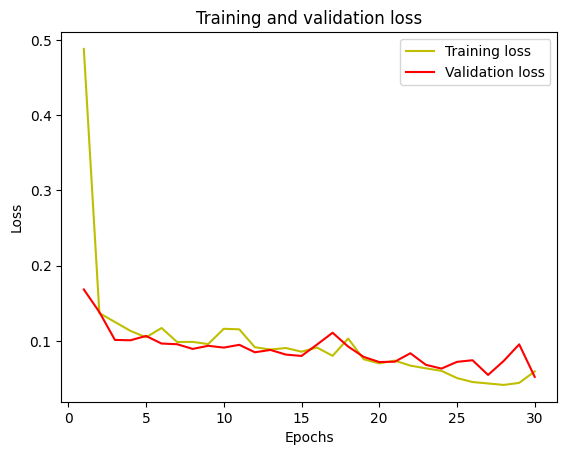

In [30]:
loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

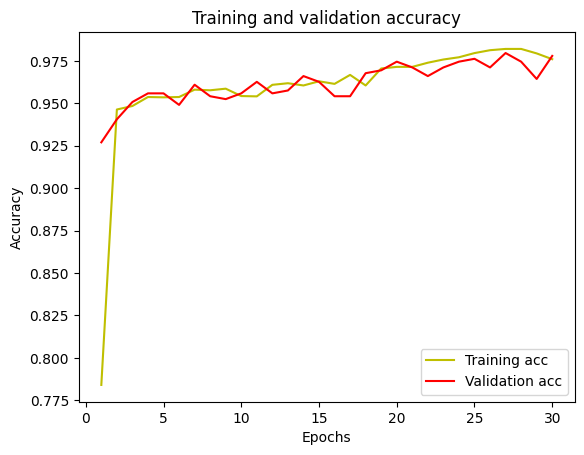

In [31]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
[[471   6  19   0   0   0]
 [  0 467   0   3   0   1]
 [  0   0 419   1   0   0]
 [  0   6   0 349 136   0]
 [  1   1   0  21 509   0]
 [  0  23   0   0   0 514]]
0.9260264675941635
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       496
           1       0.93      0.99      0.96       471
           2       0.96      1.00      0.98       420
           3       0.93      0.71      0.81       491
           4       0.79      0.96      0.86       532
           5       1.00      0.96      0.98       537

    accuracy                           0.93      2947
   macro avg       0.93      0.93      0.93      2947
weighted avg       0.93      0.93      0.92      2947



<Axes: >

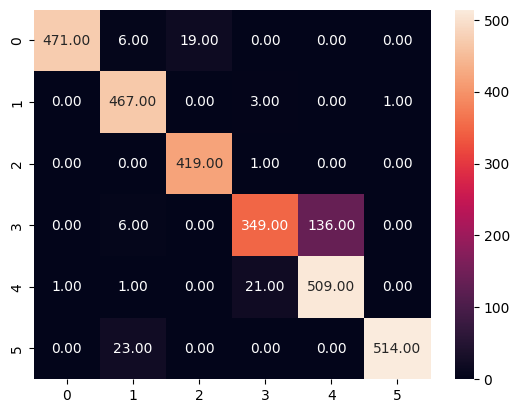

In [32]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
pred=cnn3_model.predict([testX,testX,testX,testX])
pred=np.argmax(pred, axis=-1)
cm=confusion_matrix(testy,pred)
print(cm)
print(accuracy_score(testy,pred))
print(classification_report(testy,pred))
sns.heatmap(cm, annot=True, fmt = '.2f')

쪼맨한 lstm을 넣었더니 f1-score가 오르고 acc가 조금 내려감 ?

---
resnet

In [33]:
import tensorflow as tf
from tensorflow.keras import layers, models, activations


In [40]:
class MultiHeadSelfAttention(tf.keras.layers.Layer):
    def __init__(self, dim, num_heads=4):
        super().__init__()
        assert dim % num_heads == 0, "hidden_dim must be divisible by num_heads"
        self.num_heads = num_heads
        self.head_dim = dim // num_heads

        self.query = layers.Dense(dim)
        self.key = layers.Dense(dim)
        self.value = layers.Dense(dim)
        self.out = layers.Dense(dim)
    def call(self, x):
        B = tf.shape(x)[0]
        N = tf.shape(x)[1]
        D = x.shape[-1]
        H = self.num_heads
        d = self.head_dim

        # Linear projections
        Q = tf.reshape(self.query(x), (B, N, H, d))
        K = tf.reshape(self.key(x), (B, N, H, d))
        V = tf.reshape(self.value(x), (B, N, H, d))

        Q = tf.transpose(Q, perm=[0, 2, 1, 3])  # (B, H, N, d)
        K = tf.transpose(K, perm=[0, 2, 1, 3])
        V = tf.transpose(V, perm=[0, 2, 1, 3])

        # Scaled Dot-Product Attention
        attn_score = tf.matmul(Q, K, transpose_b=True) / tf.sqrt(tf.cast(d, tf.float32))
        attn_weight = tf.nn.softmax(attn_score, axis=-1)
        attn_out = tf.matmul(attn_weight, V)  # (B, H, N, d)

        # Concat heads
        attn_out = tf.transpose(attn_out, perm=[0, 2, 1, 3])  # (B, N, H, d)
        attn_out = tf.reshape(attn_out, (B, N, D))  # (B, N, D)
        return self.out(attn_out)

In [41]:
# -----------------------------
# Transformer Encoder Layer
# -----------------------------
class CustomTransformerEncoderLayer(tf.keras.layers.Layer):
    def __init__(self, dim, num_heads=4, ff_dim=128, dropout=0.1):
        super().__init__()
        self.attn = MultiHeadSelfAttention(dim, num_heads)
        self.norm1 = layers.LayerNormalization(epsilon=1e-6)
        self.norm2 = layers.LayerNormalization(epsilon=1e-6)
        self.ff = tf.keras.Sequential([
            layers.Dense(ff_dim, activation="relu"),
            layers.Dense(dim),
        ])
        self.dropout = layers.Dropout(dropout)

    def call(self, x, training=False):
        attn_out = self.attn(x)
        x = self.norm1(x + self.dropout(attn_out, training=training))
        ff_out = self.ff(x)
        x = self.norm2(x + self.dropout(ff_out, training=training))
        return x


In [42]:
# -----------------------------
# ResNet Block
# -----------------------------
class ResNetBlock(tf.keras.layers.Layer):
    def __init__(self, channels):
        super().__init__()
        self.conv1 = layers.Conv1D(channels, 3, padding='same')
        self.bn1 = layers.BatchNormalization()
        self.conv2 = layers.Conv1D(channels, 3, padding='same')
        self.bn2 = layers.BatchNormalization()
        self.relu = layers.ReLU()

    def call(self, x, training=False):
        residual = x
        out = self.conv1(x)
        out = self.bn1(out, training=training)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out, training=training)
        out = out + residual
        return self.relu(out)


In [43]:
# -----------------------------
# 전체 모델: ResNet + Transformer + 분류기
# -----------------------------
class ResNetTransformerClassifier(tf.keras.Model):
    def __init__(self, input_dim, hidden_dim, num_classes,
                 num_resnet_blocks=2, num_transformer_layers=2,
                 num_heads=4, ff_dim=128):
        super().__init__()
        self.fc0 = layers.Dense(hidden_dim)

        self.resnet_blocks = [ResNetBlock(1) for _ in range(num_resnet_blocks)]

        self.transformer_layers = [
            CustomTransformerEncoderLayer(hidden_dim, num_heads, ff_dim)
            for _ in range(num_transformer_layers)
        ]

        self.fc_out = layers.Dense(num_classes, activation=None)

    def call(self, x, training=False):
        # (B, F) → (B, H)
        x = self.fc0(x)
        # (B, H) → (B, 1, H)
        x = tf.expand_dims(x, axis=1)
        # (B, 1, H) → (B, H, 1)
        x = tf.transpose(x, perm=[0, 2, 1])

        for block in self.resnet_blocks:
            x = block(x, training=training)

        # (B, H, 1) → (B, 1, H)
        x = tf.transpose(x, perm=[0, 2, 1])
        for layer in self.transformer_layers:
            x = layer(x, training=training)

        x = tf.squeeze(x, axis=1)
        logits = self.fc_out(x)
        probs = tf.nn.softmax(logits, axis=-1)
        return logits, probs


In [ ]:
# -----------------------------
# ✅ 모델 테스트
# -----------------------------
if __name__ == "__main__":
    model = ResNetTransformerClassifier(
        input_dim=128,    # 예시 입력 feature 수
        hidden_dim=64,
        num_classes=5,    # 예시: 5-class 분류
        num_resnet_blocks=2,
        num_transformer_layers=2
    )

    dummy = tf.random.normal((16, 128))  # (batch, feature)
    logits, probs = model(dummy)
    print("logits:", logits.shape)
    print("probs:", probs.shape)

---
트랜스포머

In [ ]:
# -----------------------------
# ✅ 모델 테스트
# -----------------------------
if __name__ == "__main__":
    model = ResNetTransformerClassifier(
        input_dim=128,    # 예시 입력 feature 수
        hidden_dim=64,
        num_classes=5,    # 예시: 5-class 분류
        num_resnet_blocks=2,
        num_transformer_layers=2
    )

    dummy = tf.random.normal((16, 128))  # (batch, feature)
    logits, probs = model(dummy)
    print("logits:", logits.shape)
    print("probs:", probs.shape)

resnet + 트랜스포머

In [44]:
# -----------------------------
# ✅ 모델 테스트
# -----------------------------
if __name__ == "__main__":
    model = ResNetTransformerClassifier(
        input_dim=128,    # 예시 입력 feature 수
        hidden_dim=64,
        num_classes=5,    # 예시: 5-class 분류
        num_resnet_blocks=2,
        num_transformer_layers=2
    )

    dummy = tf.random.normal((16, 128))  # (batch, feature)
    logits, probs = model(dummy)
    print("logits:", logits.shape)
    print("probs:", probs.shape)

logits: (16, 5)
probs: (16, 5)
